In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv ("Advertising.csv")
df.head ()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Univariate Analysis

Text(0.65, 1.25, 'prediction Prediction Univariate plot')

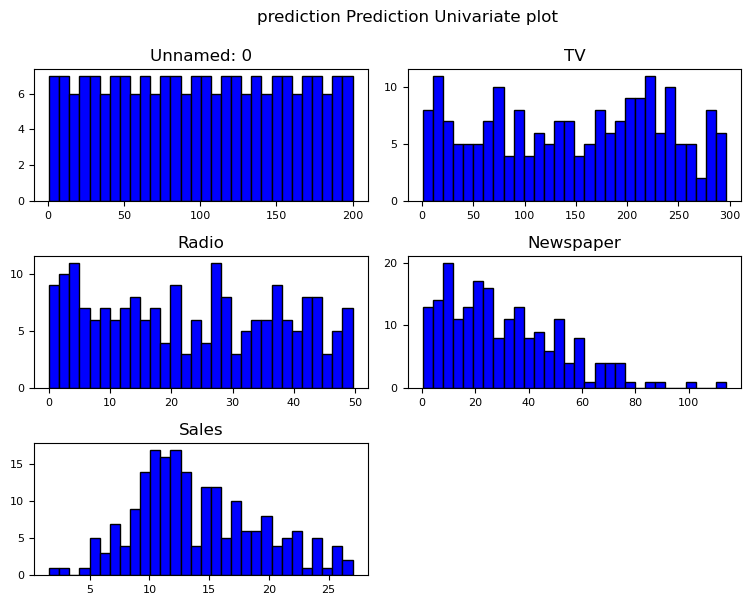

In [11]:
df.hist (bins = 30, color = "blue", edgecolor = "black", linewidth = 1,
        xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout (rect = (0, 0, 1.2, 1.2))

plt.suptitle ("prediction Prediction Univariate plot", x = 0.65, y = 1.25,
              fontsize = 12)

## Multivariate Analysis


Text(0.5, 1.0, 'sales multivariate plot')

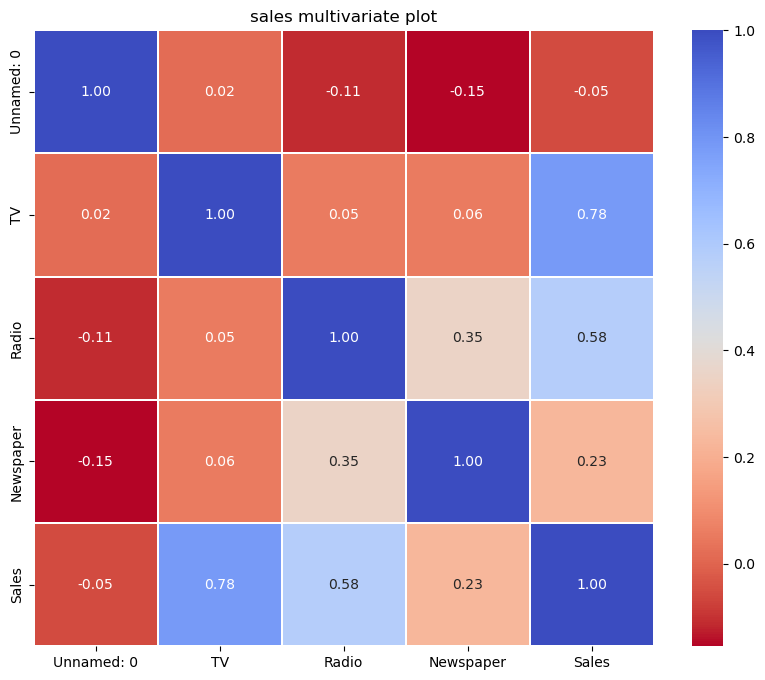

In [5]:
# multivariate analysis
corr = df.corr ()
plt.figure (figsize = (10, 8))
sns.heatmap (corr, annot = True, fmt = ".2f", cmap = "coolwarm_r", linewidth = 0.2)
plt.title ("sales multivariate plot", fontsize = 12)

## Splitting our Dataset

In [6]:
# Splitting into dependent and independent variables
x = df.drop("Sales", axis = 1)
y = df["Sales"]

# splitting our dataset into train & test set
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.8, random_state = 42)

## Modelling 

In [7]:
model = LinearRegression ().fit (x_train, y_train)

## Making predictions

In [8]:
y_pred = model.predict (x_test)

df_test = pd.DataFrame({"Actual_Sale": y_test[:20], "Pred_Sale": model.predict (x_test)[:20]})
df_test

,Actual_Sale,Pred_Sale
95,16.9,16.412277
15,22.4,20.843193
30,21.4,21.511869
158,7.3,10.653100
128,24.7,22.124058
115,12.6,13.123835
69,22.3,21.037489
170,8.4,7.503854
174,11.5,13.647870
45,14.9,15.120409


In [9]:
r2_score (y_test, model.predict (x_test))

0.8986489151417081

### Comparing our predicted and actaul price using a line plot

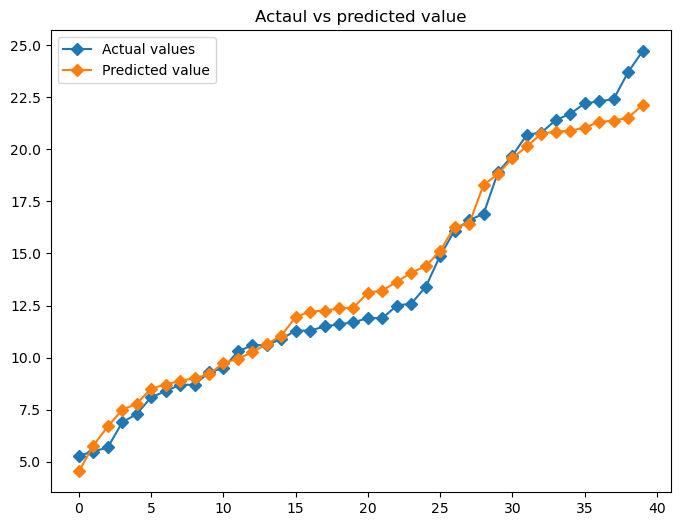

In [10]:
plt.figure (figsize = (8,6))
plt.plot (sorted (y_test), label = "Actual values", marker = "D")
plt.plot (sorted (y_pred), label = "Predicted value", marker = "D")
plt.title ("Actaul vs predicted value")

plt.legend ()
plt.show ()